In [2]:
# image = Image.open("img.jpg")
import cv2


In [3]:
image= cv2.imread('img.jpg')
type(image)

numpy.ndarray

In [4]:
image.shape

(667, 1000, 3)

In [5]:
print(image.max)
print(image.min)

<built-in method max of numpy.ndarray object at 0x0000026961426EB0>
<built-in method min of numpy.ndarray object at 0x0000026961426EB0>


In [6]:
import matplotlib.pyplot as plt

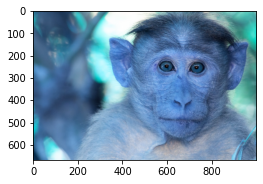

In [7]:
plt.figure(figsize=(4,4))
plt.imshow(image)
plt.show()

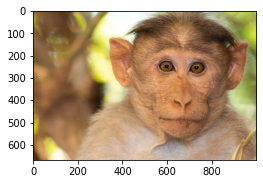

In [8]:
new_image= cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(4,4))
plt.imshow(new_image)
plt.show()
# to save the file
# cv2.imwrite("filename.jpg",image)

In [9]:
image_gray=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [10]:
image_gray.shape

(667, 1000)

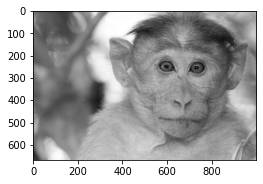

In [11]:
plt.figure(figsize=(4,4))
plt.imshow(image_gray, cmap='gray')
plt.show()

In [12]:
cv2.imwrite('gray_image.jpg',image_gray)


True

# color channels

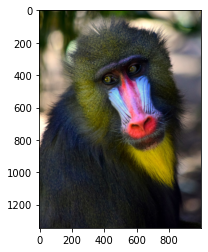

In [13]:
image1= cv2.imread('img1.jpg')
plt.figure(figsize=(4,4))
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.show()


In [14]:
blue=image1[:,:,0]
green=image1[:,:,1]
red=image1[:,:,2]

In [15]:
print(red)
image1[0,0]

[[ 33  31  29 ... 134 138 143]
 [ 34  32  31 ... 131 135 139]
 [ 34  33  35 ... 129 133 137]
 ...
 [ 42  46  44 ...   6   5   4]
 [ 44  47  44 ...   4   3   2]
 [ 45  47  43 ...   3   2   1]]


array([ 4, 49, 33], dtype=uint8)

In [16]:
im_bgr= cv2.vconcat([blue, green, red])
im_bgr

array([[ 4,  2,  0, ..., 95, 87, 87],
       [ 5,  3,  2, ..., 92, 84, 83],
       [ 5,  4,  2, ..., 88, 80, 79],
       ...,
       [42, 46, 44, ...,  6,  5,  4],
       [44, 47, 44, ...,  4,  3,  2],
       [45, 47, 43, ...,  3,  2,  1]], dtype=uint8)

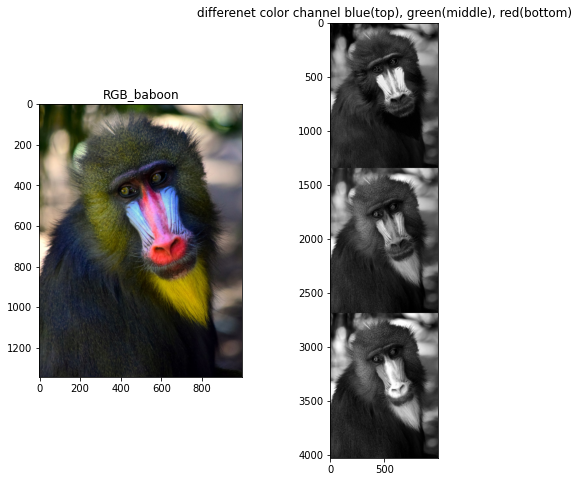

In [17]:
plt.figure(figsize=(8,8))
plt.subplot(121)
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.title("RGB_baboon")
plt.subplot(122)
plt.imshow(im_bgr, cmap='gray')
plt.title("differenet color channel blue(top), green(middle), red(bottom)")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

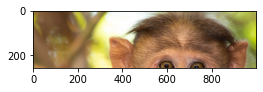

In [18]:
# slicing the image. for example returning the first 256 rows
rows=256
plt.figure(figsize=(4,4))
plt.imshow(new_image[0:rows,:,:])
plt.show

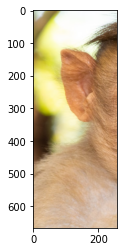

In [19]:
columns= 512
plt.figure(figsize=(4,4))
plt.imshow(new_image[:,256:columns,:])
plt.show()

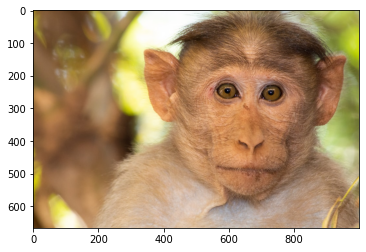

In [20]:
dup_newimg= new_image.copy()
plt.imshow(dup_newimg)
plt.show()

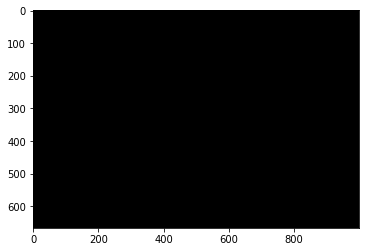

In [21]:
b= dup_newimg
dup_newimg[:,:,:]=0
plt.imshow(b)
plt.show()

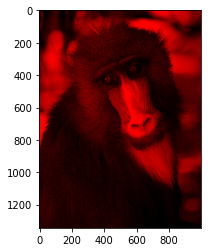

In [22]:
bab_red= image1.copy()
bab_red[:,:,0]=0  # making the green one zero
bab_red[:,:,1] =0 #making the blue one zero

plt.figure(figsize=(4,4))
plt.imshow(cv2.cvtColor(bab_red, cv2.COLOR_BGR2RGB))
plt.show()

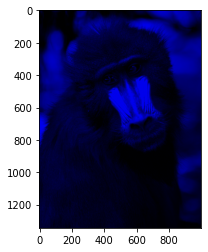

In [23]:
bab_blue= image1.copy()
bab_blue[:,:,1]=0  # making the green one zero
bab_blue[:,:,2] =0 #making the red one zero

plt.figure(figsize=(4,4))
plt.imshow(cv2.cvtColor(bab_blue, cv2.COLOR_BGR2RGB))
plt.show()

# Rotation of the image

In [24]:
# rotating an image
import math
import numpy as np
def image_rotate(image, degree):
    rads = math.radians(degree)
 
    # finding width and height of the rotated image
    height_rot_img= round(abs(image.shape[0]*math.cos(rads))) + round(abs(image.shape[1]*math.sin(rads)))
    width_rot_img= round(abs(image.shape[1]*math.cos(rads))) + round(abs(image.shape[0]*math.sin(rads)))
    
    print(image.shape[0])
    print(image.shape[1])
    
    #making the image of the same size after the rotation
    rot_img = np.uint8(np.zeros((height_rot_img,width_rot_img,image.shape[2])))
    


    #finding the center point of the original image
    height = rot_img.shape[0]
    width = rot_img.shape[1]

    cx= width//2 
    cy= height//2
    # center for the rotated image
    midx = width_rot_img//2
    midy= height_rot_img//2



    for i in range(rot_img.shape[0]):
        for j in range(rot_img.shape[1]):
            x = (i-midx) * math.cos(rads) + (j-midy) * math.sin(rads)
            y = (i-midx) * math.sin(rads) + (j-midy) * math.cos(rads)

            x= round(x)+cy
            y= round(y)+cx

            if(x>=0 and y>=0 and x< image.shape[0] and y<image.shape[1]):
                rot_img[i,j,:] = image[x,y,:]
            
    
    # return rot_img
    plt.figure(figsize=(4,4))
    plt.imshow(rot_img)
    plt.show()



667
1000


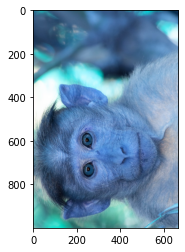

In [25]:
image_rotate(image,90)



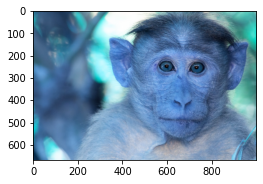

In [26]:
plt.figure(figsize=(4,4))
plt.imshow(image)
plt.show()

# half mirror

original image


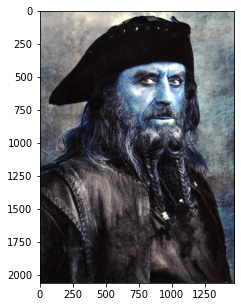

half_mirrored image


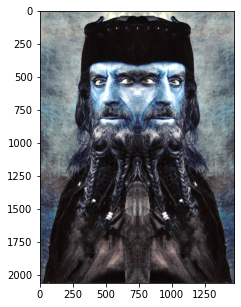

In [27]:

def half_mirror(image):
    #print number of rows
    # print(image.shape[0])
    #print number of columns
    # print(image.shape[1])
    #print the rows pixcels from row 0 to 4 and columns 0 to 2
    # print(image[0:4,0:2])
    
    for i in range(image.shape[0]-1):
        k= image.shape[1]
        r=k//2
        for j in range(image.shape[1]-1):
            # print(image[i,j])
            # print(image[i,k-1])
            temp= image[i,j]
            image[i,j]= image[i,k-1]
            image[i,k-1]= temp
            k=k-1

            if k==r:
                break

    print("half_mirrored image")
    plt.figure(figsize=(5,5))
    plt.imshow(image)
    plt.show()
                

img1= cv2.imread('img2.jpg')
plt.figure(figsize=(5,5))
plt.imshow(img1)
print("original image")
plt.show()
half_mirror(img1)


original image


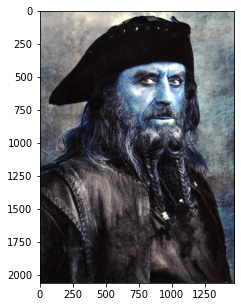

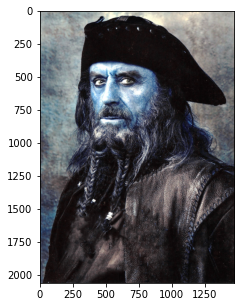

In [28]:

def horizontal_flip(image):
    img2=image.copy()
    
    for i in range(image.shape[0]-1):
        k= image.shape[1]
        r=k//2
        for j in range(r):
            # print(image[i,j])
            # print(image[i,k-1])
            # swap(image[i,j],image[i,k-1])
            if k==r:
                break
            else:
                image[i,j] = image[i,k-1]
                image[i,k-1] = img2[i,j]
                k = k-1

    plt.figure(figsize=(5,5))
    plt.imshow(image)
    plt.show()
                
img1= cv2.imread('img2.jpg')
plt.figure(figsize=(5,5))
plt.imshow(img1)
print("original image")
plt.show()
horizontal_flip(img1)

# shortcut to flip and  rotate the image

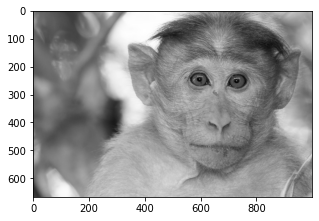

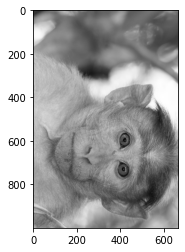

In [29]:
photo = cv2.imread("gray_image.jpg")
plt.figure(figsize=(5,5))
plt.imshow(photo)
plt.show()

rot_photo= cv2.rotate(photo,0)
plt.imshow(rot_photo)
plt.show()

# cropping of Image

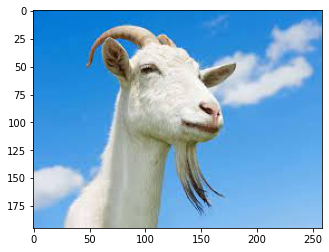

In [30]:
image_exp = cv2.imread("down.jpg")
# cv2.cvtColor(bab_blue, cv2.COLOR_BGR2RGB)
plt.imshow(cv2.cvtColor(image_exp, cv2.COLOR_BGR2RGB))
plt.show()

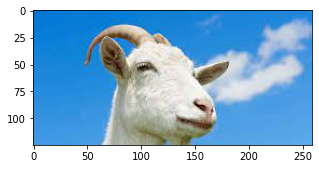

In [31]:
upper= 0
lower= 125

crop_top = image_exp[upper:lower,:,:]
plt.figure(figsize=(5,5))
plt.imshow(cv2.cvtColor(crop_top, cv2.COLOR_BGR2RGB))
plt.show()

# working with the image pixels

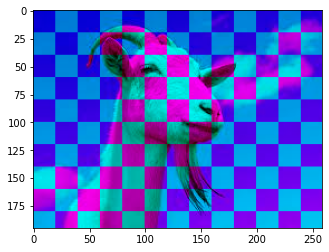

In [78]:
img_pix= np.copy(image_exp)
# img_pix[50:100,50:100,1]=0
img_pix= cv2.cvtColor(img_pix, cv2.COLOR_BGR2RGB)
r= img_pix.shape[0]
c= img_pix.shape[1]

m=20

x=m
z=2

for i in range(0,r-1,m):
    s=2
    t=m
    for j in range(0,c-1,m):
        #i =0,
        # j =0,50,100,150,200,250
        if z%2==0:
            if s%2==0:
                img_pix[i:x,j:t,1]=0
            else:
                img_pix[i:x,j:t,0]=0
        else:
            if s%2==0:
                img_pix[i:x,j:t,0]=0
            else:
                img_pix[i:x,j:t,1]=0

        t=t+m
        s=s+1
    x=x+m
    z=z+1


plt.imshow(img_pix)
plt.show()



chnaging the pixcles of a image


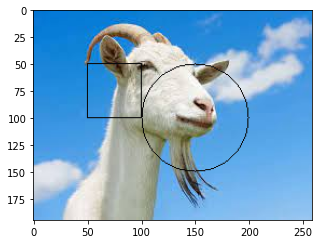

In [87]:
img_sk= np.copy(image_exp)
plt.figure(figsize=(5,5))
img_sk= cv2.cvtColor(img_sk, cv2.COLOR_BGR2RGB)
# pt1= left upper point
#pt2= right below point of the rectangel
cv2.rectangle(img_sk, pt1=(50,50), pt2=(100,100), color=(10,10,10),thickness=1)
cv2.circle(img_sk, center=(150,100), radius=50,color=(10,10,10),thickness=1)
plt.imshow(img_sk)
plt.show()